In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
sns.set_style('whitegrid')

In [5]:
tweets = pd.read_csv('../raw_data/TheBridge_Tech_Tweets.csv')

In [6]:
tweets.head()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote
0,1611338908196913153,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-01-06 12:28:27+00:00,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,0,0,2,0
1,1610652818234347521,¿Te interesa el diseño de #producto digital? V...,2023-01-04 15:02:11+00:00,10279282,Jesús Pérez Serna,mkpositivo,2,0,3,0
2,1610606391445815297,¡Empezamos el año con una #masterclass de #uxu...,2023-01-04 11:57:41+00:00,2402179123,Jorge González Revilla,jorgegrev,2,0,3,0
3,1610581093119365121,¿Te planteas un futuro como diseñador #uxui?🎨\...,2023-01-04 10:17:10+00:00,1162694149956603904,The Bridge,TheBridge_Tech,3,0,4,0
4,1610236180309868544,"Echa un👀a la historia de Verónica, alumni del ...",2023-01-03 11:26:36+00:00,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0


In [7]:
for tweet in tweets['tweet_text'].values:
    print('#'*50)
    print(tweet)

##################################################
Gracias a nuestros amigos @TheBridge_Tech por acogernos otra vez! 🙏
##################################################
¿Te interesa el diseño de #producto digital? Ven a una #masterclass de #uxui gratuita gracias a #BBKbootcamps

📅 Jueves 12 de enero a las 18:30h.
🕐 1 hora
👥 @BBK_Kuna, Urazurrutia Kalea 3, #Bilbao
Organiza: BBK Bootcamps by @TheBridge_Tech  https://t.co/T3xvMIT9My
##################################################
¡Empezamos el año con una #masterclass de #uxui! Introducción al diseño de #producto digital gracias a Jose Luis Tienza 

📅 Jueves 12 de enero a las 18:30h.
🕐 1 hora
👥 @BBK_Kuna, Urazurrutia Kalea 3, #Bilbao
Organiza: BBK Bootcamps by @TheBridge_Tech

https://t.co/yHHKfmgJQ1
##################################################
¿Te planteas un futuro como diseñador #uxui?🎨

Asiste a nuestra masterclass en #Bilbao con @BBK_eus y descubre todo sobre una de las profesiones más demandadas🙌

📆12 ene
⏰18.30h
📍En @BBK_

In [8]:
tweets_new = []
for tweet in tweets['tweet_text'].values:
        sentence = ' '.join([word.replace('?', '').replace('¿', '').replace('!', '').replace('¡', '') for word in tweet.split() 
                             if word.replace('?', '').replace('¿', '').replace('!', '').replace('¡', '').isalpha()])
        tweets_new.append(sentence)              

In [9]:
tweets['tweets_new'] = tweets_new

In [10]:
tweets.tail()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,tweets_new
170,1612479188589486088,¿Quieres formarte en #desarrolloweb? Conéctate...,2023-01-09 15:59:31+00:00,1162694149956603904,The Bridge,TheBridge_Tech,1,0,1,0,Quieres formarte en Conéctate a nuestra sesión...
171,1612429007739396097,Ya tenemos confirmado el sitio donde haremos e...,2023-01-09 12:40:07+00:00,1003872445,Pau Mugarra,PauMugarra,2,0,7,0,Ya tenemos confirmado el sitio donde haremos e...
172,1612411945251905537,¿Quieres conocer nuestro campus de Madrid?\n\n...,2023-01-09 11:32:19+00:00,1162694149956603904,The Bridge,TheBridge_Tech,1,0,1,0,Quieres conocer nuestro campus de Madrid Acérc...
173,1612384123816910852,¿Quieres desarrollar tu carrera en el mundo di...,2023-01-09 09:41:46+00:00,570795448,EDEM,EDEMempresarios,2,0,4,2,Quieres desarrollar tu carrera en el mundo dig...
174,1611813891322908672,🚀 @EDEMempresarios y @TheBridge_Tech se alía...,2023-01-07 19:55:52+00:00,271028835,Valientes Emprendedores,valientesempren,2,0,7,0,y se alían para impartir bootcamps de desarrol...


In [11]:
with open('../model/sentiment_model', 'rb') as f:
    model = pickle.load(f)

In [12]:
model

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [13]:
tweets['Prediction'] = model.predict(tweets['tweets_new'])

## What are the predictions? Interpretations

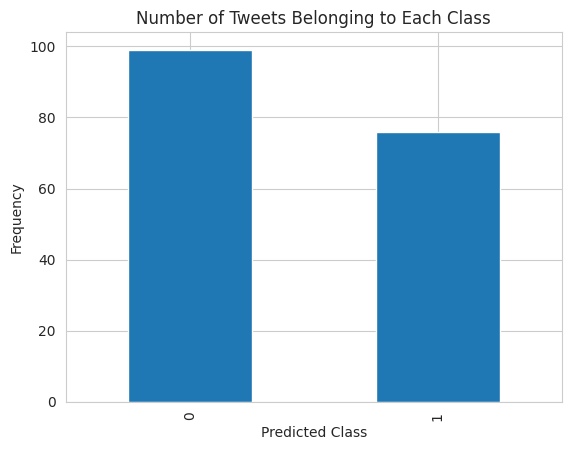

In [14]:
pd.DataFrame(tweets['Prediction'].value_counts()).plot(kind = 'bar', legend = False)
plt.xlabel("Predicted Class")
plt.ylabel("Frequency")
plt.title("Number of Tweets Belonging to Each Class");

In [15]:
tweets.head()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,tweets_new,Prediction
0,1611338908196913153,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-01-06 12:28:27+00:00,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,0,0,2,0,Gracias a nuestros amigos por acogernos otra vez,0
1,1610652818234347521,¿Te interesa el diseño de #producto digital? V...,2023-01-04 15:02:11+00:00,10279282,Jesús Pérez Serna,mkpositivo,2,0,3,0,Te interesa el diseño de digital Ven a una de ...,1
2,1610606391445815297,¡Empezamos el año con una #masterclass de #uxu...,2023-01-04 11:57:41+00:00,2402179123,Jorge González Revilla,jorgegrev,2,0,3,0,Empezamos el año con una de Introducción al di...,0
3,1610581093119365121,¿Te planteas un futuro como diseñador #uxui?🎨\...,2023-01-04 10:17:10+00:00,1162694149956603904,The Bridge,TheBridge_Tech,3,0,4,0,Te planteas un futuro como diseñador Asiste a ...,0
4,1610236180309868544,"Echa un👀a la historia de Verónica, alumni del ...",2023-01-03 11:26:36+00:00,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0,Echa la historia de alumni del bootcamp de que...,1


#### So 1 or 0 is positive or negative?

In [16]:
for tweet, new in tweets[tweets['Prediction'] == 0][['tweet_text', 'tweets_new']].values:
    print('#'*50)
    print(new)

##################################################
Gracias a nuestros amigos por acogernos otra vez
##################################################
Empezamos el año con una de Introducción al diseño de digital gracias a Jose Luis Tienza Jueves de enero a las hora Urazurrutia Kalea BBK Bootcamps by
##################################################
Te planteas un futuro como diseñador Asiste a nuestra masterclass en con y descubre todo sobre una de las profesiones más ene
##################################################
Los bootcamps tecnológicos de EDEM y en los empleos más demandados Data Science Desarrollo Web Full Stack Product Design Ciberseguridad Toda la info
##################################################
acoge el de enero un Open Day en el que participan responsables de y de para presentar los bootcamps que acercarán a sus alumnos a profesiones con alta demanda
##################################################
En tenemos un deseo para Qué el venga cargado de éxitos Fel

#### So the label 1 seems to be related with more neutral tweets that are more informative. Label 0 is more associated with more personal tweets that share something more personal

In [17]:
tweets = pd.concat([tweets, pd.DataFrame(model.predict_proba(tweets['tweets_new']), columns = ['Pred_0', 'Pred_1'])], axis = 1)

In [18]:
predictions_summary = tweets[['tweets_new', 'Prediction', 'Pred_0', 'Pred_1']].copy()

In [19]:
predictions_summary.head()

,tweets_new,Prediction,Pred_0,Pred_1
0,Gracias a nuestros amigos por acogernos otra vez,0,0.553027,0.446973
1,Te interesa el diseño de digital Ven a una de ...,1,0.433882,0.566118
2,Empezamos el año con una de Introducción al di...,0,0.741256,0.258744
3,Te planteas un futuro como diseñador Asiste a ...,0,0.547459,0.452541
4,Echa la historia de alumni del bootcamp de que...,1,0.231670,0.768330


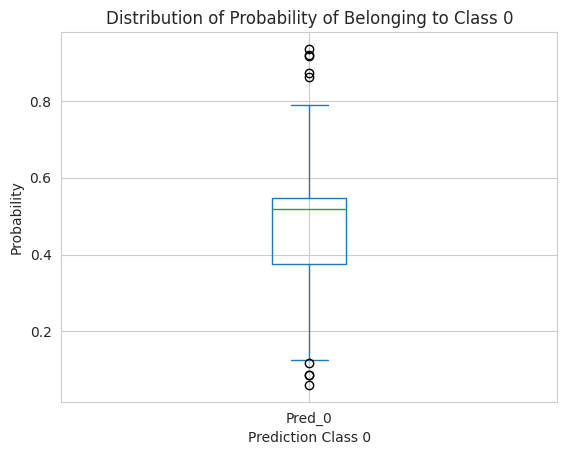

In [20]:
pd.DataFrame(tweets['Pred_0']).plot(kind = 'box')
plt.xlabel("Prediction Class 0")
plt.ylabel("Probability")
plt.title("Distribution of Probability of Belonging to Class 0");

In [21]:
def new_three(row):
    if row['Pred_0'] > 0.6:
        return 'Personal'
    elif row['Pred_1'] > 0.6:
        return 'Info'
    else:
        return 'Unsure'   

In [22]:
predictions_summary['New_Predictions'] = predictions_summary.apply(lambda x: new_three(x), axis = 1)

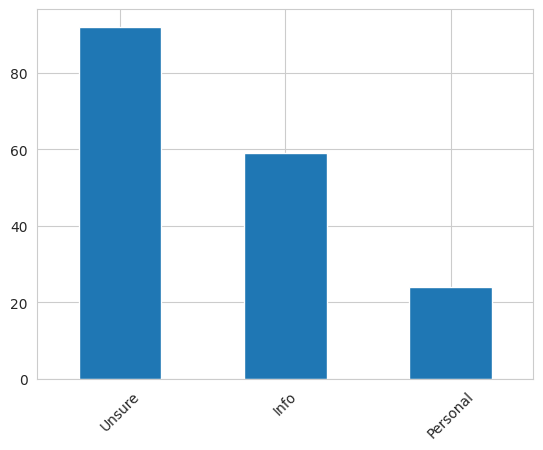

In [23]:
predictions_summary['New_Predictions'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 45);

In [24]:
predictions_summary[predictions_summary['New_Predictions'] == 'Info']['tweets_new'].values

array(['Echa la historia de alumni del bootcamp de que decidió reorientar su carrera como abogada hacia la Poco a poco más mujeres forman parte del sector Dale al Conoce más sobre el',
       'se alía con para impartir bootcamps tecnológicos en La alianza busca reducir la brecha digital existente potenciando la formación tecnológica con más empleabilidad y demanda dentro del mercado laboral',
       'Si estás buscando una profesión que te cambie la acércate a nuestro Open Day donde presentaremos la alianza una serie de bootcamps de desarrollo digital y',
       'Formación y la aceleradora de talento digital se unen para impartir tecnológicos El objetivo es reducir la brecha digital y potenciar la formación en competencias digitales y tecnológicas',
       'Ven al próximo y conoce los de y Fórmate en y ene La Marina de Apúntate ya',
       'la revolución formativa en y nos unimos para formar en profesiones que cambiarán Especialízate en intensivos sobre Este es el inicio del',
       'N

In [25]:
predictions_summary[predictions_summary['New_Predictions'] == 'Personal']['tweets_new'].values

array(['Empezamos el año con una de Introducción al diseño de digital gracias a Jose Luis Tienza Jueves de enero a las hora Urazurrutia Kalea BBK Bootcamps by',
       'EDEM y The Bridge se alían para impartir bootcamps de desarrollo digital y tecnológico en Valencia',
       'Hoy llegó mi de en con promovido por y financiado por Toca celebrar',
       'Hoy es el Feliz miércoles a todos nuestros',
       'Qué son los de BBK y Son cursos de metodología Bootcamp de Desarrollo Web Full y Diseño de Producto Nora Sarasola nos los cuenta',
       'organiza el I Congreso de para de diciembre modalidad presencial Palacio Pº de Madrid de a Inscríbete ya Aforo limitado',
       'Acelerando juntos el en El próximo de nuestro Juan Zamora presentará Hopla en las instalaciones de a las Contaremos quiénes qué hacemos y cómo desarrollar una fructífera con',
       'Aprende hoy las profesiones del inscríbete en el Junto con podrás aprender sobre Desarrollo Web Full Data Ciberseguridad y Diseño de produ

In [26]:
predictions_summary[predictions_summary['New_Predictions'] == 'Unsure']['tweets_new'].values

array(['Gracias a nuestros amigos por acogernos otra vez',
       'Te interesa el diseño de digital Ven a una de gratuita gracias a Jueves de enero a las hora Urazurrutia Kalea BBK Bootcamps by',
       'Te planteas un futuro como diseñador Asiste a nuestra masterclass en con y descubre todo sobre una de las profesiones más ene',
       'Empieza el año formándote en una de las profesiones con más 𝗱𝗲𝗺𝗮𝗻𝗱𝗮 Toma las riendas del y vente el al Open Day donde te contaremos todo sobre los Bootcamps que te cambiarán la vida junto a',
       'Los bootcamps tecnológicos de EDEM y en los empleos más demandados Data Science Desarrollo Web Full Stack Product Design Ciberseguridad Toda la info',
       'acoge el de enero un Open Day en el que participan responsables de y de para presentar los bootcamps que acercarán a sus alumnos a profesiones con alta demanda',
       'En tenemos un deseo para Qué el venga cargado de éxitos Felices',
       'y se alían para impartir bootcamps de desarrollo digital 

## Important Variables

In [27]:
count_vec_dict = model.named_steps['vect'].vocabulary_

In [28]:
reverse_vocab_dict = {count_vec_dict[key]: key for key in count_vec_dict}

In [29]:
reverse_vocab_dict

{439: 'graci',
 578: 'mar',
 700: 'pens',
 947: 'va',
 953: 'van',
 500: 'intent',
 831: 'sac',
 44: 'algui',
 512: 'ja',
 887: 'suen',
 513: 'ja ja',
 921: 'toc',
 298: 'dl',
 360: 'especial',
 118: 'buen',
 275: 'dia',
 751: 'primer',
 573: 'mand',
 7: 'abraz',
 443: 'grand',
 607: 'miguel',
 384: 'famili',
 469: 'hoy',
 722: 'podr',
 856: 'ser',
 473: 'human',
 119: 'buen dia',
 552: 'list',
 328: 'empez',
 197: 'congres',
 549: 'link',
 104: 'bdi',
 325: 'em',
 866: 'si',
 556: 'llev',
 561: 'lueg',
 674: 'orbyt',
 621: 'moment',
 284: 'dig',
 876: 'sistem',
 307: 'econom',
 798: 'recort',
 286: 'diner',
 878: 'social',
 592: 'medi',
 369: 'eur',
 100: 'banc',
 645: 'necesit',
 36: 'ajust',
 981: 'viern',
 785: 'rat',
 50: 'amig',
 943: 'univers',
 130: 'call',
 94: 'ayud',
 997: 'zapater',
 780: 'quier',
 45: 'algun',
 939: 'ultim',
 202: 'consej',
 615: 'ministr',
 203: 'consej ministr',
 263: 'denunci',
 813: 'respons',
 352: 'ere',
 231: 'cuatr',
 142: 'carg',
 330: 'emple',
 8

In [30]:
model_coefs = pd.DataFrame(model.named_steps['cls'].coef_[0], columns = ['Coef'])

In [31]:
model_coefs['Variables'] = [reverse_vocab_dict[i] for i in range(1000)]

In [32]:
model_coefs.head()

,Coef,Variables
0,-0.161174,_rubalcaba_
1,0.582204,abandon
2,0.498377,abc
3,-0.061534,abc_es
4,0.195989,abces


### The most important words in model

In [33]:
print('10 most positive words')
model_coefs.sort_values(by = 'Coef').head(10)

10 most positive words


,Coef,Variables
333,-1.860511,encant
340,-1.844937,enhorabuen
439,-1.805330,graci
118,-1.675119,buen
390,-1.473085,feliz
106,-1.459033,bes
209,-1.346429,cont link
795,-1.344679,recomend
467,-1.292089,homenaj
40,-1.254216,alejandrosanz


In [34]:
print('10 most negative words')
model_coefs.sort_values(by = 'Coef', ascending = False).head(10)

10 most negative words


,Coef,Variables
232,1.427234,cuent
255,1.402206,deficit
110,1.368604,blanc
630,1.350257,muert
194,1.342907,conden
263,1.342179,denunci
798,1.318572,recort
489,1.315082,indign
228,1.310442,critic
221,1.269698,cos


### So it is clear that the variables going in are stemmitizised, accents removed and that stop words have been removed
### So I will reprocess the tweet text to remove stop words and carry out stemming before re-running the model.predict

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/sean/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords

In [37]:
spanish_stop_words = stopwords.words('spanish')

In [38]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [39]:
def remove_stop_words(tweet):
    return ' '.join([stemmer.stem(word).replace('á', 'a').replace('ó', 'o').replace('ú', 'u').replace('é', 'e').replace('í', 'i')
                      for word in tweet.split() if word not in spanish_stop_words])

In [40]:
tweets['tweets_processed'] = [remove_stop_words(tweet) for tweet in tweets['tweets_new']]

In [41]:
tweets.head()

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,tweets_new,Prediction,Pred_0,Pred_1,tweets_processed
0,1611338908196913153,Gracias a nuestros amigos @TheBridge_Tech por ...,2023-01-06 12:28:27+00:00,1530194743786881024,Bitcoin Tuesday,BitcoinTuesday_,0,0,2,0,Gracias a nuestros amigos por acogernos otra vez,0,0.553027,0.446973,graci amig acog vez
1,1610652818234347521,¿Te interesa el diseño de #producto digital? V...,2023-01-04 15:02:11+00:00,10279282,Jesús Pérez Serna,mkpositivo,2,0,3,0,Te interesa el diseño de digital Ven a una de ...,1,0.433882,0.566118,te interes diseñ digital ven gratuit graci jue...
2,1610606391445815297,¡Empezamos el año con una #masterclass de #uxu...,2023-01-04 11:57:41+00:00,2402179123,Jorge González Revilla,jorgegrev,2,0,3,0,Empezamos el año con una de Introducción al di...,0,0.741256,0.258744,empez año introduccion diseñ digital graci jos...
3,1610581093119365121,¿Te planteas un futuro como diseñador #uxui?🎨\...,2023-01-04 10:17:10+00:00,1162694149956603904,The Bridge,TheBridge_Tech,3,0,4,0,Te planteas un futuro como diseñador Asiste a ...,0,0.547459,0.452541,te plant futur diseñ asist masterclass descubr...
4,1610236180309868544,"Echa un👀a la historia de Verónica, alumni del ...",2023-01-03 11:26:36+00:00,1162694149956603904,The Bridge,TheBridge_Tech,1,0,2,0,Echa la historia de alumni del bootcamp de que...,1,0.231670,0.768330,echa histori alumni bootcamp decid reorient ca...


### Now we can re-run the predict

In [42]:
tweets['Processed_Prediction'] = model.predict(tweets['tweets_processed'])

In [43]:
tweets[tweets['tweet_id'] == 1614612463361695747]

,tweet_id,tweet_text,tweet_date,user_id,user_name,user_username,tweet_retweet,tweet_reply,tweet_like,tweet_quote,tweets_new,Prediction,Pred_0,Pred_1,tweets_processed,Processed_Prediction
160,1614612463361695747,"Advanced #Cynefin, Estuarine mapping &amp; EUF...",2023-01-15 13:16:23+00:00,41545659,Mario Lopez de Avila,nodosenlared,49,7,321,4,Advanced Estuarine mapping EUFG Masterclass Lo...,1,0.085913,0.914087,advanc estuarin mapping eufg masterclass los i...,0


In [44]:
tweets['Processed_Prediction'].value_counts()

0    127
1     48
Name: Processed_Prediction, dtype: int64

In [45]:
tweets = pd.concat([tweets, pd.DataFrame(model.predict_proba(tweets['tweets_processed']), columns = ['Proc_Pred_0', 'Proc_Pred_1'])], axis = 1)

In [46]:
tweet_assessment = tweets[['tweet_text', 'Prediction', 'Pred_0', 'Pred_1', 'tweets_processed', 'Processed_Prediction', 'Proc_Pred_0', 'Proc_Pred_1']]

In [47]:
tweet_assessment.sort_values(by = 'Proc_Pred_1')['tweet_text'].values

array(['🔙 Ayer vivimos una jornada muy interesante en el evento de presentación de la nueva edición de #BBKBootcamps realizada en colaboración con @TheBridge_Tech en la @BAT_Tower. Muchas gracias a todas las personas que acudisteis a la presentación 🤗\n\n➕ℹ️  https://t.co/4tyJZlGVPW https://t.co/39Y275Hr5Y',
       '🤝🏻 Un placer aportar nuestro granito de arena en el #bootcamp de @TheBridge_Tech \n\nGracias a todos los asistentes por la acogida, estamos ultimando detalles de nuestra Guía de Empleo para que la tengáis disponible a lo largo del mes de febrero 📌🎁\n\n¡Nos vemos pronto!😁 https://t.co/CLTRmUN9Ob',
       '🔵Acelera tu carrera digital con #BBKBootcamps.\n\nGracias a la colaboración entre @BBK_eus y @TheBridge_Tech podrás formarte con los mejores profesionales para lograr un trabajo con proyección.\n\n🔗Elige tu curso https://t.co/RxICpzj9N6\n\n#ux #developers #ciberseguridad #datascience',
       '¡Empezamos el año con una #masterclass de #uxui! Introducción al diseño de #produ

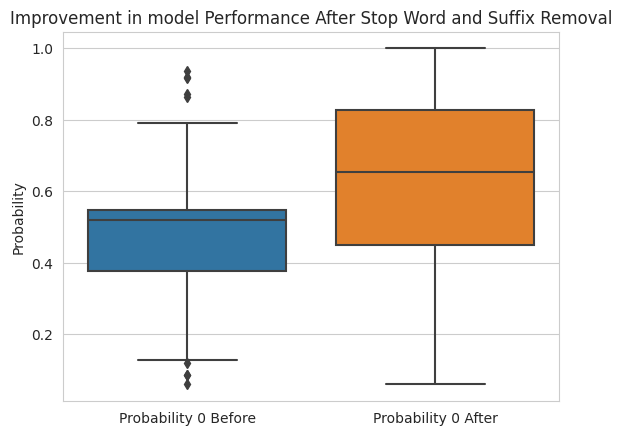

In [48]:
sns.boxplot(tweet_assessment[['Pred_0', 'Proc_Pred_0']])
plt.xticks(ticks = [0,1], labels = ['Probability 0 Before', 'Probability 0 After'])
plt.title('Improvement in model Performance After Stop Word and Suffix Removal')
plt.ylabel('Probability');